In [1]:
import sys
import scipy.io as sio
import numpy as np
sys.path.append("../src")
import TopologicalAdvection as TA
import matplotlib.pyplot as plt

In [2]:
filein_contents = sio.loadmat('tau.1.05_20000pt_.01step.mat')
times = filein_contents['times'][:,0].tolist()
xin = filein_contents['x_coordinates'].tolist()
yin = filein_contents['y_coordinates'].tolist()
print("There are ", len(times), " time-steps, and ",len(xin), " potential trajectories.")

There are  2227  time-steps, and  20000  potential trajectories.


In [3]:
numtraj_vals = [5,10,20,40,80,160,320,640,1280,2560,5120,10240,20000]
val_choice = 5
numtraj = numtraj_vals[val_choice]
traj = []
for t in range(len(times)):
    traj.append([[xin[i][t],yin[i][t]] for i in range(numtraj)])

In [4]:
num_times = 100
TopAdvec = TA.TopologicalAdvection(traj[:num_times], times[:num_times])

In [5]:
TopAdvec.SetPrintParameters(triplot = True)

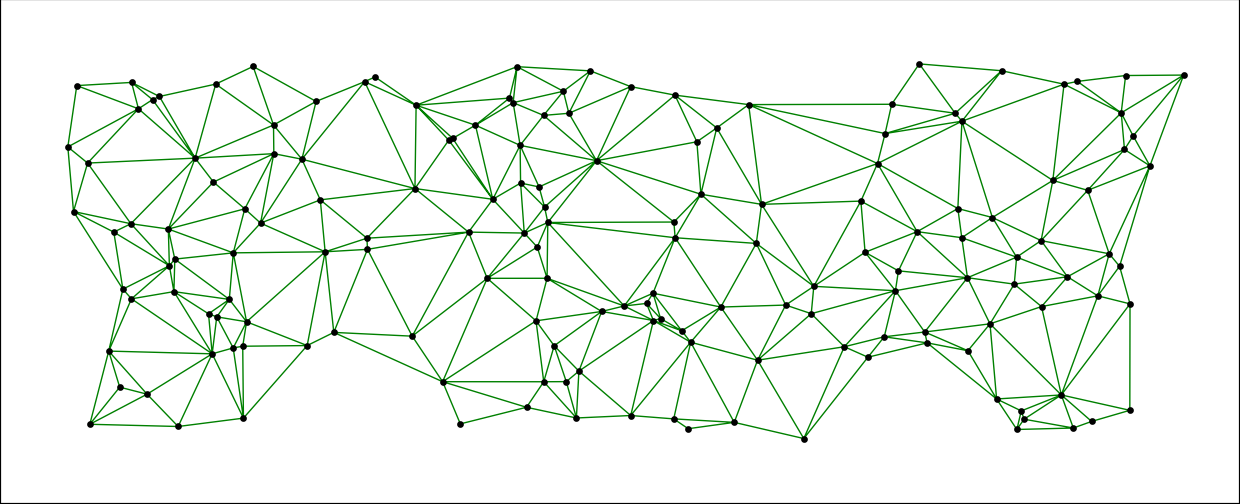

In [6]:
TopAdvec.Plot(Loop = False, Initial = True)

In [7]:
TE, TE_err, Weights = TopAdvec.GetTopologicalEntropy()

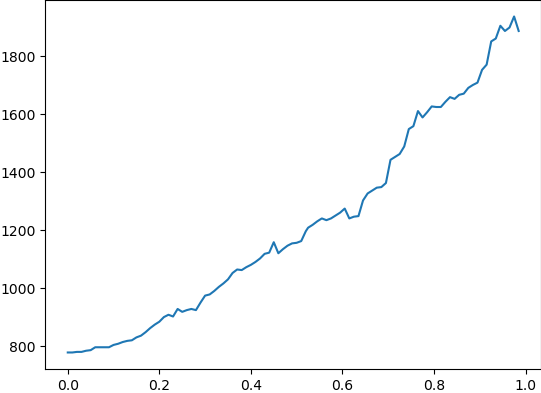

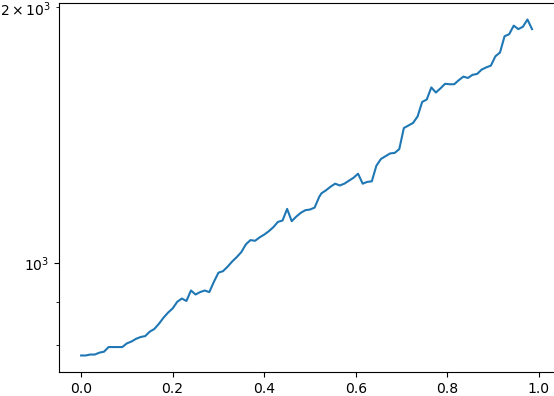

In [8]:
plt.plot(TopAdvec.Times, TopAdvec.TotalWeightOverTime)
plt.show()
plt.semilogy(TopAdvec.Times, TopAdvec.TotalWeightOverTime)
plt.show()

In [9]:
print(TopAdvec.Domain)

[[-0.27134603300156906, -1.3314477028163787], [6.268948650368442, 1.3312519593516172]]


In [10]:
TopAdvec.ClearCurves()
TopAdvec.CurveGenerator.AddEllipse([2.5,0.0], 2.0, 0.5, phi = 0.0)

In [11]:
TopAdvec.LoadCurves()

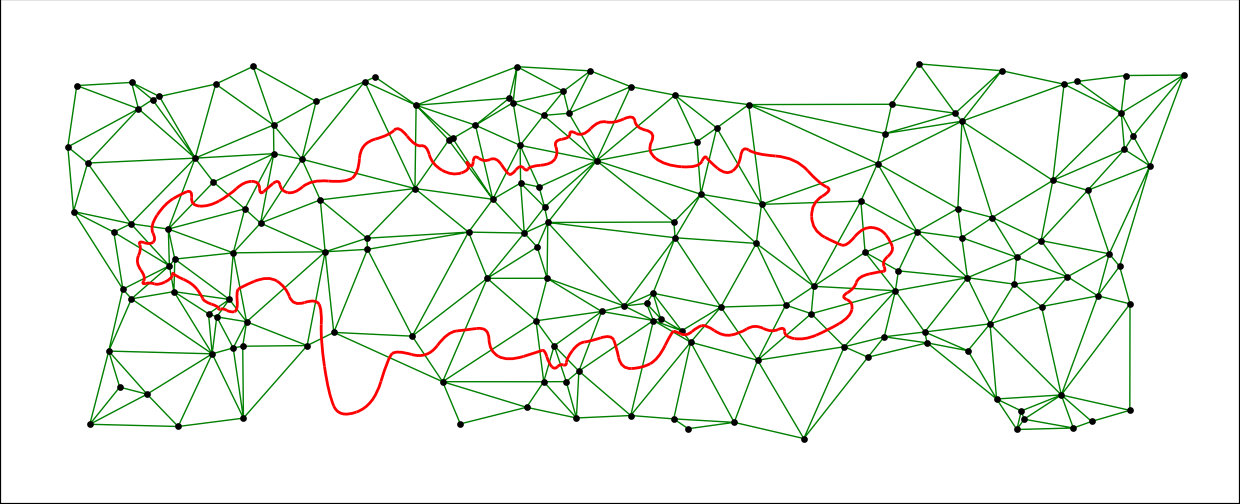

In [12]:
TopAdvec.Plot(Initial = True)

In [13]:
TopAdvec.EvolveLoop()

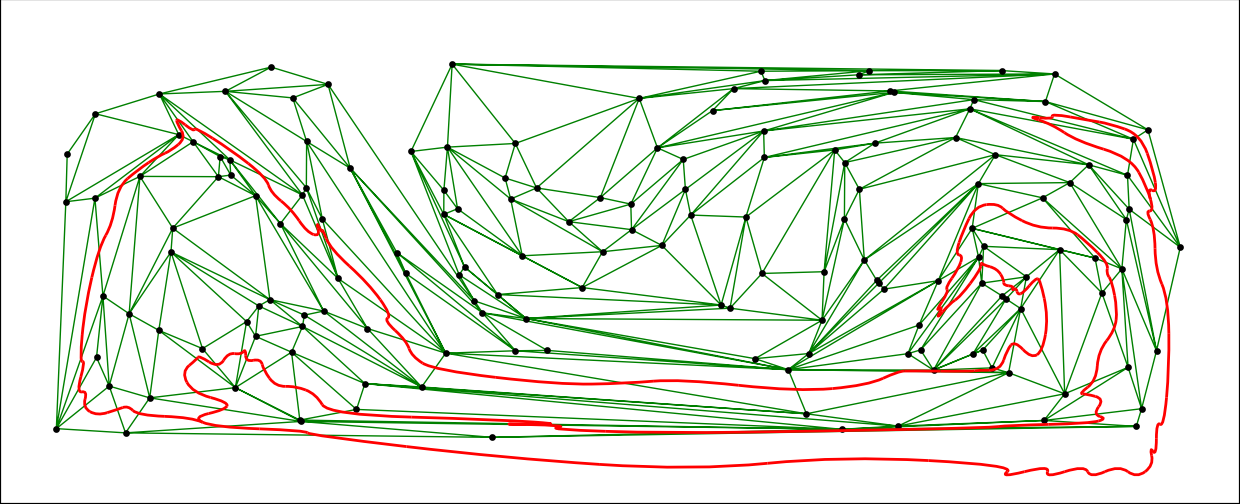

In [14]:
TopAdvec.Plot(Initial = False)

In [15]:
TopAdvec.ResetTri()
TopAdvec.EvolveTri(Delaunay = True)
TopAdvec.LoadCurves()
TopAdvec.EvolveLoop()

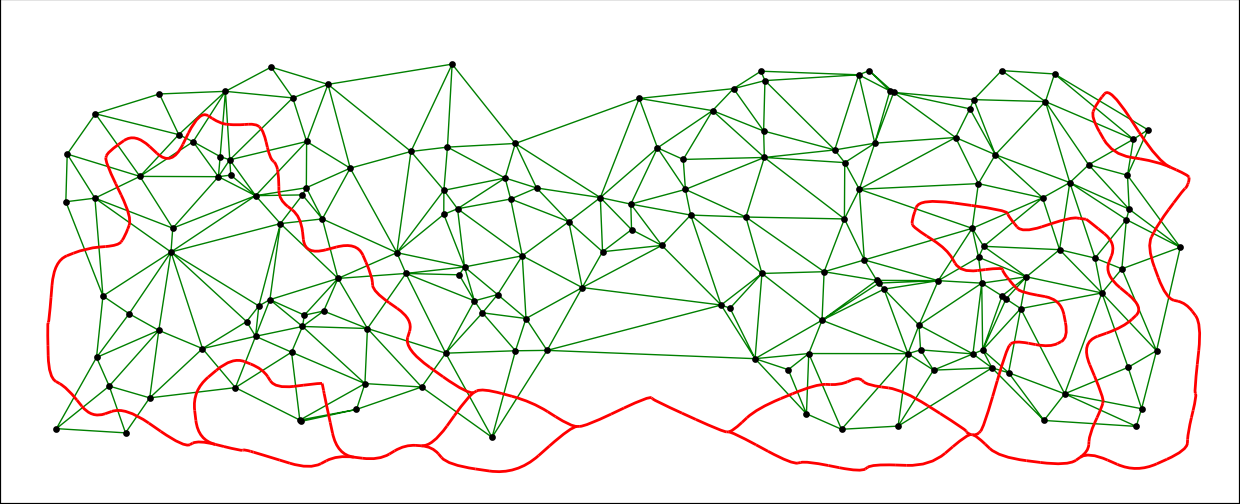

In [16]:
TopAdvec.Plot(Initial = False)

In [ ]:
TopAdvec.MoviePlots()

Now let's try the periodic BC version.